In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
features = pd.read_csv("../../data/temps.csv")
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


数据表中
* year,moth,day,week分别表示的具体的时间
* temp_2：前天的最高温度值
* temp_1：昨天的最高温度值
* average：在历史中，每年这一天的平均最高温度值
* actual：这就是我们的标签值了，当天的真实最高温度
* friend：这一列可能是凑热闹的，你的朋友猜测的可能值

In [4]:
# 时间转换
from datetime import datetime

features["dates"] = features.apply(
  lambda x: datetime(x['year'], x['month'], x['day']),
  axis=1
)

In [5]:
features.head()


,year,month,day,week,temp_2,temp_1,average,actual,friend,dates
0,2016,1,1,Fri,45,45,45.6,45,29,2016-01-01
1,2016,1,2,Sat,44,45,45.7,44,61,2016-01-02
2,2016,1,3,Sun,45,44,45.8,41,56,2016-01-03
3,2016,1,4,Mon,44,41,45.9,40,53,2016-01-04
4,2016,1,5,Tues,41,40,46.0,44,41,2016-01-05


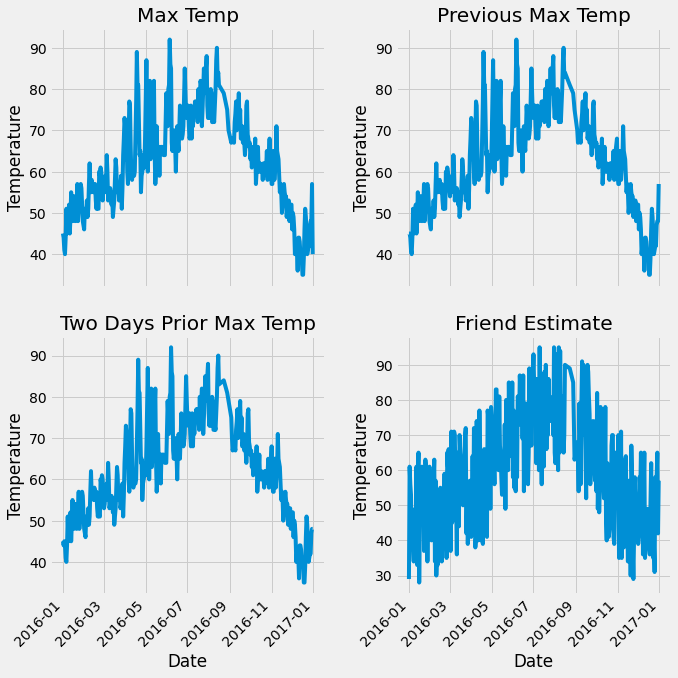

In [7]:
# 准备画图
# 指定默认风格
plt.style.use("fivethirtyeight")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.autofmt_xdate(rotation=45)

# 标签值
ax1.plot(features["dates"], features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# 昨天
ax2.plot(features["dates"], features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# 前天
ax3.plot(features["dates"], features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# 我的逗逼朋友
ax4.plot(features["dates"], features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

